# Mushroom Classification - Safe to eat or deadly poison?


Group 6: Rui Li, Xi Yang, Ava (Yan) Zhang 
<br>Last Updated: 16 Mar 2021

## Introduction

* Which features are most indicative of a poisonous mushroom?

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

## Data Source:
https://www.kaggle.com/uciml/mushroom-classification

## Main Purpose:
* Which features are most indicative of a poisonous mushroom?
* What types of machine learning models perform best on predicting the edibility on this dataset? 
* How certain can we be?

## 2. Dataset Overview & Description


This dataset gives descriptions of mushrooms samples corresponding to 23 species of grilled mushrooms in the Agaricus and Lepiota family mushrooms. This descriptions can be divided in the diferent parts of the mushroom (cap, gill, stalk, veil(annulus)), for each part it gives information like its shape, size, color,... In the dataset there is also some attributes that gives details from their habitat or their odor.
Attribute Information: (classes: edible = e, poisonous = p)

* cap-shape: bell = b, conical = c,convex = x, flat = f, knobbed = k, sunken = s
* cap-surface: fibrous = f, grooves = g, scaly = y, smooth = s
* cap-color: brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y
* bruises: yes = t, no = f
* odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s
* gill-attachment: attached = a, descending = d, free = f, notched = n
* gill-spacing: close = c, crowded = w, distant = d
* gill-size: broad = b, narrow = n
* gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w ,yellow = y
* stalk-shape: enlarging = e, tapering = t
* stalk-rootbulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
* stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s
* stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s
* stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
* stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
* veil-type: partial = p, universal = u
* veil-color: brown = n, orange = o, white = w, yellow = y
* ring-number: none = n, one = o, two = t
* ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z
* spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o,purple = u, white = w, yellow = y
* population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
* habitat: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d

Machine Learning Tasks:
* Logistic Regression Model
* Naive Bayes Model
* Random Forest Classification Model
* Decision Tree Classification Model
* Kernel SVM Model
* Neural Networks
* DNN (Deep Neural Networks)



## 3. Data Exploration

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import*
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import re
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# tells matplotlib to embed plots within the notebook
%matplotlib inline

#### 1) General Description

In [2]:
mushroom_df = pd.read_csv('mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
mushroom_df['class'].unique()

array(['p', 'e'], dtype=object)

In [4]:
mushroom_df.shape

(8124, 23)

In [5]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Check for the Missing Values in the Dataset

In [6]:
mushroom_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


####  2) Data visualization


Goals
- Check the correlatins between variables using heatmap
- Use dual histograms to compare edible and poisonous mushrooms across all features
- Qualitatively guess which features are collinear or heavily skewed


<img src="images/mushroom.png">

Convert the catagrical variables to numerical

In [8]:
df = mushroom_df.copy()

In [9]:
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [10]:
for col in df.columns:
    df[str(col)] = label_encoded(df[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [11]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [12]:
cor = df.corr()
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.00,0.05,0.18,-0.03,-0.50,-0.09,0.13,-0.35,0.54,-0.53,-0.10,-0.38,-0.33,-0.30,-0.15,-0.15,nan,0.15,-0.21,-0.41,0.17,0.30,0.22
cap-shape,0.05,1.00,-0.05,-0.05,-0.04,-0.02,0.08,0.01,0.05,-0.01,0.06,0.03,-0.03,-0.03,-0.03,-0.03,nan,0.07,-0.11,-0.03,-0.07,0.06,-0.04
cap-surface,0.18,-0.05,1.00,-0.02,0.07,0.05,-0.03,-0.28,0.21,-0.16,-0.01,-0.13,0.09,0.11,0.07,0.07,nan,-0.02,-0.03,-0.11,0.23,0.02,0.16
cap-color,-0.03,-0.05,-0.02,1.00,-0.00,-0.39,0.04,0.14,-0.17,0.08,-0.46,0.32,-0.06,-0.05,0.00,0.01,nan,0.04,-0.01,0.16,-0.29,-0.14,0.03
bruises,-0.50,-0.04,0.07,-0.00,1.00,-0.06,0.14,-0.30,-0.37,0.53,0.10,0.24,0.46,0.46,0.08,0.09,nan,0.12,0.06,0.69,-0.29,0.09,-0.08
odor,-0.09,-0.02,0.05,-0.39,-0.06,1.00,-0.06,0.06,0.31,-0.13,0.46,-0.21,0.12,0.06,0.17,0.17,nan,-0.06,0.11,-0.28,0.47,-0.04,-0.03
gill-attachment,0.13,0.08,-0.03,0.04,0.14,-0.06,1.00,0.07,0.11,-0.13,0.19,0.14,-0.09,-0.12,0.10,0.10,nan,0.90,0.09,-0.15,-0.03,0.17,-0.03
gill-spacing,-0.35,0.01,-0.28,0.14,-0.30,0.06,0.07,1.00,-0.11,0.10,0.08,0.35,-0.21,-0.21,0.27,0.25,nan,0.07,0.24,-0.20,0.05,-0.53,-0.15
gill-size,0.54,0.05,0.21,-0.17,-0.37,0.31,0.11,-0.11,1.00,-0.52,0.21,-0.34,0.06,0.01,0.30,0.28,nan,0.10,-0.17,-0.46,0.62,0.15,0.16
gill-color,-0.53,-0.01,-0.16,0.08,0.53,-0.13,-0.13,0.10,-0.52,1.00,-0.18,0.32,0.22,0.26,-0.06,-0.07,nan,-0.10,0.10,0.63,-0.42,-0.03,-0.20


In [13]:
# Check for the colinearity between X variables
cor[cor < 1].stack().abs().nlargest(40)[::2]

gill-attachment           veil-color                 0.90
bruises                   ring-type                  0.69
gill-color                ring-type                  0.63
gill-size                 spore-print-color          0.62
class                     gill-size                  0.54
stalk-root                spore-print-color          0.54
class                     gill-color                 0.53
gill-spacing              population                 0.53
bruises                   gill-color                 0.53
gill-size                 gill-color                 0.52
class                     bruises                    0.50
stalk-color-above-ring    stalk-color-below-ring     0.49
ring-type                 spore-print-color          0.49
odor                      spore-print-color          0.47
gill-size                 ring-type                  0.46
bruises                   stalk-surface-above-ring   0.46
odor                      stalk-shape                0.46
bruises       

In [14]:
cor_class = cor['class']
cor_class[cor_class < 1].abs().sort_values()

cap-color                  0.03
cap-shape                  0.05
odor                       0.09
stalk-shape                0.10
gill-attachment            0.13
veil-color                 0.15
stalk-color-below-ring     0.15
stalk-color-above-ring     0.15
spore-print-color          0.17
cap-surface                0.18
ring-number                0.21
habitat                    0.22
population                 0.30
stalk-surface-below-ring   0.30
stalk-surface-above-ring   0.33
gill-spacing               0.35
stalk-root                 0.38
ring-type                  0.41
bruises                    0.50
gill-color                 0.53
gill-size                  0.54
Name: class, dtype: float64

Question: why odor is not strong correlation with class? 

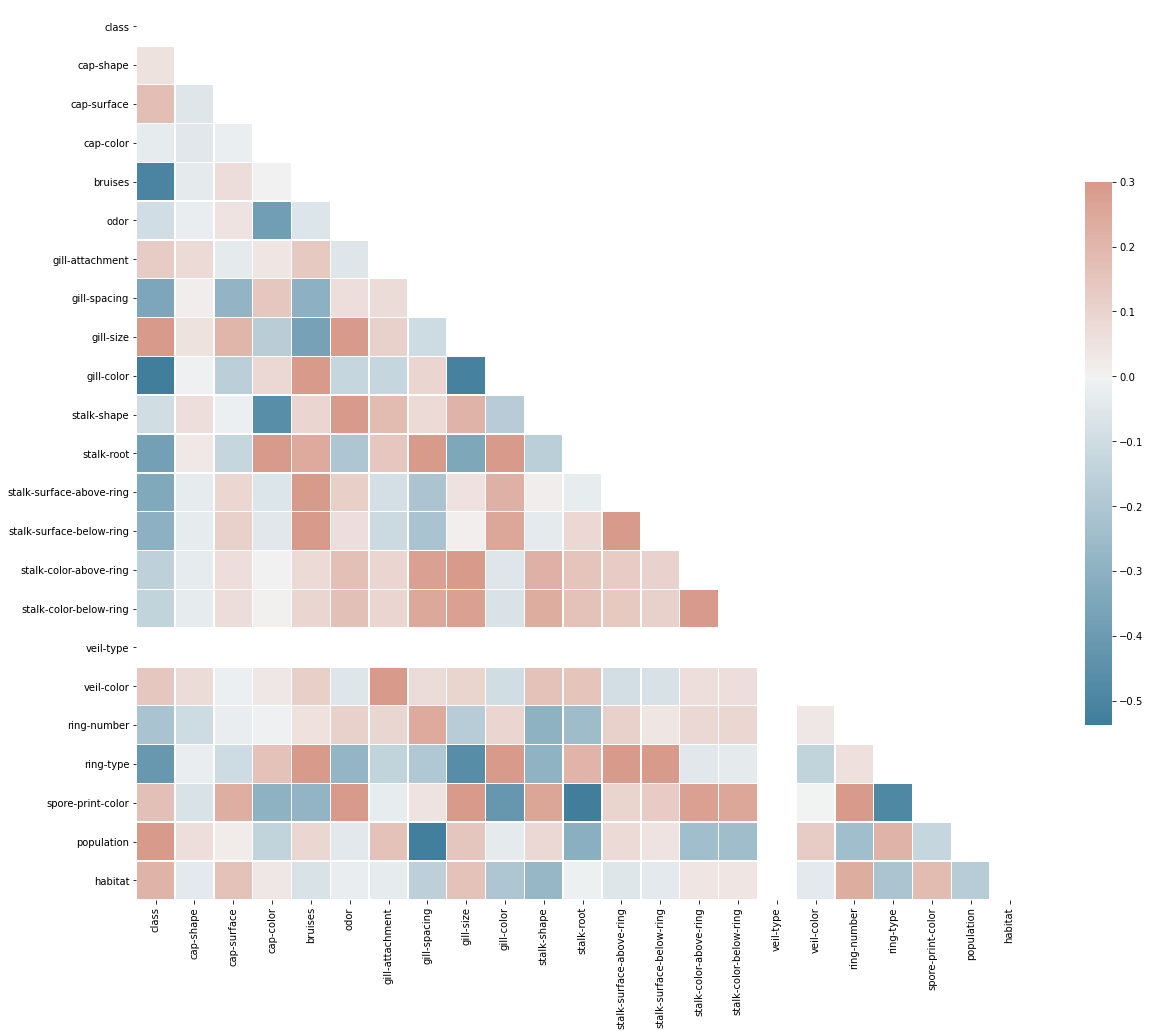

In [15]:
cor = df.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [16]:
from numpy.core.defchararray import add

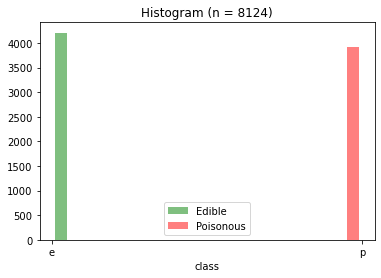

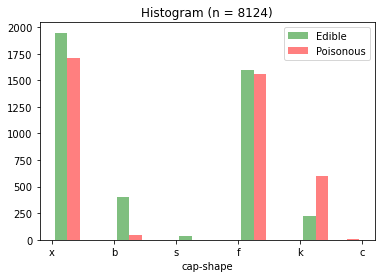

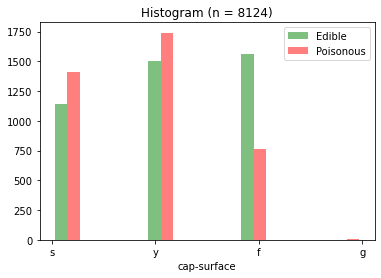

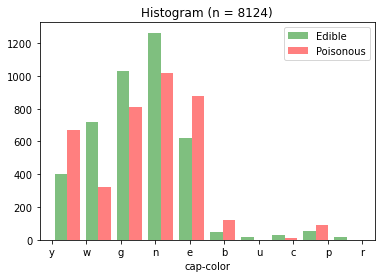

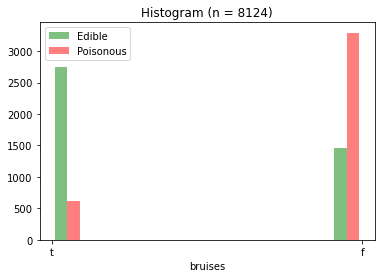

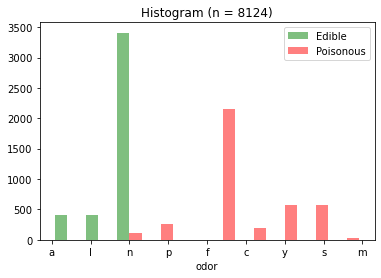

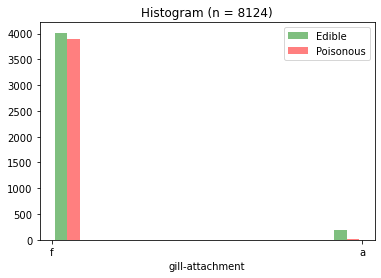

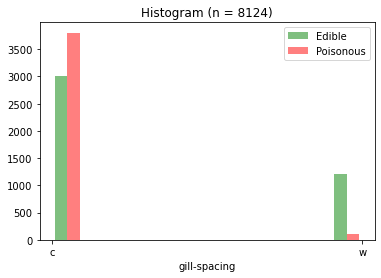

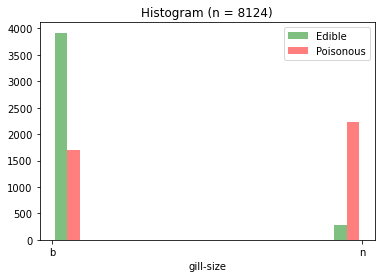

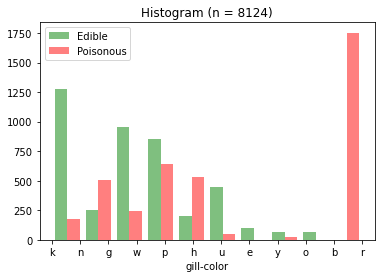

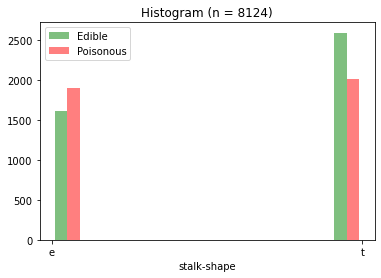

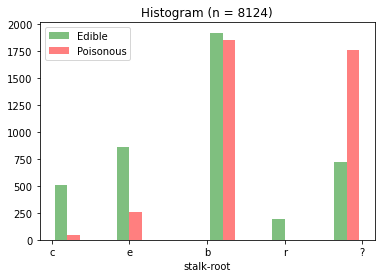

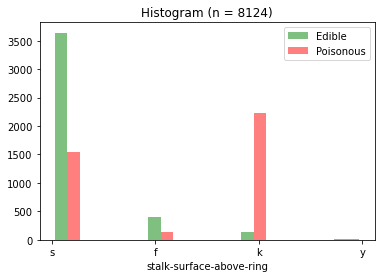

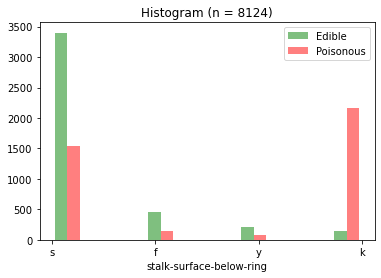

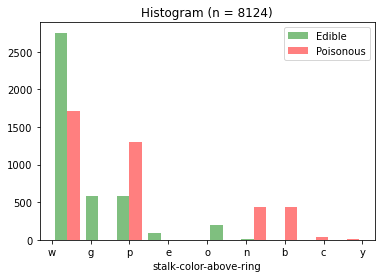

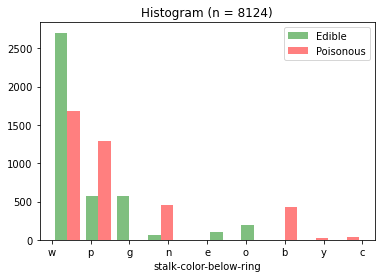

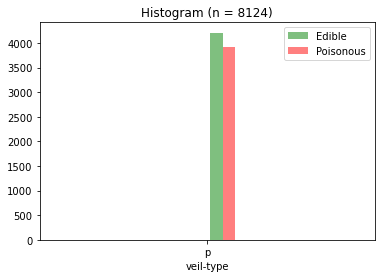

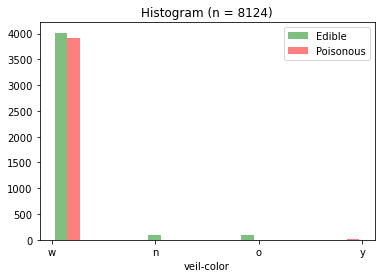

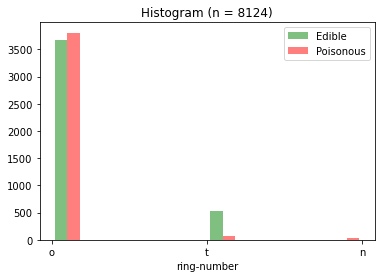

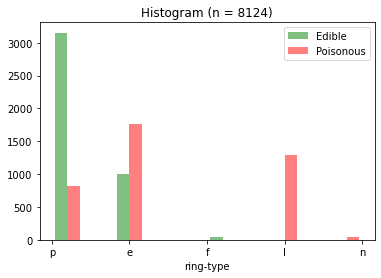

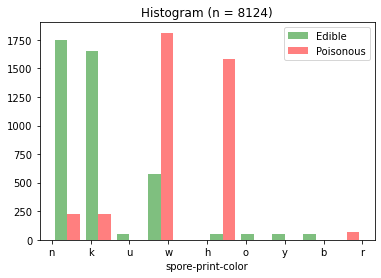

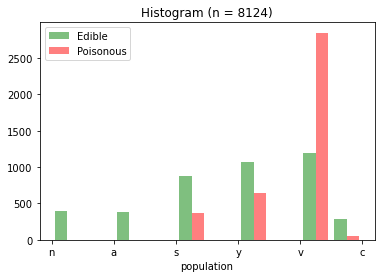

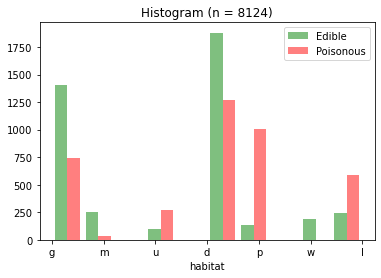

In [17]:
def histCompare(edf, pdf, feature):
    '''Plot a dual histogram of edible and poisonous mushrooms for a 
    certain feature.
    @param edf --> (pandas dataframe) a dataframe of edible mushrooms
    @param pdf --> (pandas dataframe) a dataframe of poisonous mushrooms
    @param feature --> (string) the name of the feature to be compared
    '''
    e_array = list(edf[feature])
    p_array = list(pdf[feature])
    plt.hist([e_array, p_array], color=['g', 'r'], alpha=0.5)
    plt.xlabel(feature)
    plt.title('Histogram (n = 8124)')
    plt.legend(['Edible', 'Poisonous'])
    plt.show()

# read in .csv data as pandas dataframe
mushroom_df = pd.read_csv('mushrooms.csv', encoding='utf-8')

# separate dataframe by class
edible_df = mushroom_df.loc[mushroom_df['class'] == 'e']
poisonous_df = mushroom_df.loc[mushroom_df['class'] == 'p']

# obtain list of features
features = list(mushroom_df)

# generate comparative histograms for each feature
for feat in features:
    histCompare(edible_df, poisonous_df, feat)

Observations about the data:

* We have a roughly equal number of positive (edible) and negative (poisonious) examples, so we don't need to worry about balancing each training batch with enough of both classes.

* Without any formal test for correlation, stalk characteristics above and below the ring seem to be collinear. Let's omit the stalk features below the ring. Having redundant features will lead to overfitting.

* Veil type and veil color are heavily skewed towards one of its categories, and the edibility of mushrooms don't seem to make a difference here. Let's omit these features too.

* Odor, spore print color, gill color, gill size, stalk surface above/below ring, and bruises seem to have lots of valuable information in determining the edibility of a mushroom.

#### 3) Feature engineering

Goals
- Use dummy variables to represent categorical data containing > 2 categories
- Use binary variables to represent features containing 2 categories
- Omit collinear, heavily skewed, or otherwise flawed features


Dummy Features: Cap shape, cap surface, cap color, odor, gill color, stalk root, stalk surface above ring, stalk color above ring, stalk color below ring, ring type, spore print color, population, and habitat.

Binary Features: Class, bruises, gill attachment, gill spacing, gill size, stalk shape, and ring number.

Omitted Features: Stalk surface below ring, veil type, veil color.

In [18]:
def encodeDummy(df, feature):
    '''Encode a given feature into dummy variables, omitting the first
    alphabetically-sorted category. Remove the original feature.
    
    @param df --> (pandas dataframe) dataframe to be modified
    @param feature --> (str) name of feature
    @return df --> (pandas dataframe) modified dataframe
    '''
    labels = np.unique(df[feature])
    labels = add(feature, labels)
    le = LabelEncoder()
    dummy_labels = le.fit_transform(df[feature])
    df[feature] = dummy_labels
    dummy_features = pd.get_dummies(df[feature], drop_first=True)
    df[labels[1:]] = dummy_features
    return df.drop(feature, axis=1)
    

def encodeBinary(df, feature, positive):
    '''Encode a given feature into a binary variable with 'positive' as 1 and
    all other values as 0.
    
    @param df --> (pandas dataframe) dataframe to be modified
    @param feature --> (str) name of feature
    @param positive --> (str) category to be a positive binary
    @return df --> (pandas dataframe) modified dataframe
    '''
    positive_arr = df[feature] == positive
    df.loc[positive_arr, feature] = 1
    df.loc[~positive_arr, feature] = 0
    return df

def encodeOmit(df, feature):
    '''Omit feature from dataframe.
    
    @param df --> (pandas dataframe) dataframe to be modified
    @param feature --> (str) name of feature
    @return df --> (pandas dataframe) modified dataframe
    '''
    return df.drop(feature, axis=1)

# read in .csv data as pandas dataframe
mushroom_df = pd.read_csv('mushrooms.csv', encoding='utf-8')

# select features to encode or omit
my_dummies = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color',
              'stalk-root', 'stalk-surface-above-ring', 
              'stalk-color-above-ring', 'ring-type', 'spore-print-color', 
              'population', 'habitat']

my_binaries = [('class', 'e'), ('bruises', 't'), ('gill-attachment', 'f'),
               ('gill-spacing', 'c'), ('gill-size', 'b'), ('stalk-shape', 't'), 
               ('ring-number', 'o')]

my_omissions = ['stalk-surface-below-ring', 'stalk-color-below-ring',
                'veil-type', 'veil-color']


for feat in my_dummies:
    mushroom_df = encodeDummy(mushroom_df, feat)
for feat, pos in my_binaries:
    mushroom_df = encodeBinary(mushroom_df, feat, pos)
for feat in my_omissions:
    mushroom_df = encodeOmit(mushroom_df, feat)


mushroom_df.to_csv('mushrooms_encoded.csv')

In [19]:
data = pd.read_csv('mushrooms_encoded.csv')
data.head()

,Unnamed: 0,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shapec,cap-shapef,cap-shapek,cap-shapes,cap-shapex,cap-surfaceg,cap-surfaces,cap-surfacey,cap-colorc,cap-colore,cap-colorg,cap-colorn,cap-colorp,cap-colorr,cap-coloru,cap-colorw,cap-colory,odorc,odorf,odorl,odorm,odorn,odorp,odors,odory,gill-colore,gill-colorg,gill-colorh,gill-colork,gill-colorn,gill-coloro,gill-colorp,gill-colorr,gill-coloru,gill-colorw,gill-colory,stalk-rootb,stalk-rootc,stalk-roote,stalk-rootr,stalk-surface-above-ringk,stalk-surface-above-rings,stalk-surface-above-ringy,stalk-color-above-ringc,stalk-color-above-ringe,stalk-color-above-ringg,stalk-color-above-ringn,stalk-color-above-ringo,stalk-color-above-ringp,stalk-color-above-ringw,stalk-color-above-ringy,ring-typef,ring-typel,ring-typen,ring-typep,spore-print-colorh,spore-print-colork,spore-print-colorn,spore-print-coloro,spore-print-colorr,spore-print-coloru,spore-print-colorw,spore-print-colory,populationc,populationn,populations,populationv,populationy,habitatg,habitatl,habitatm,habitatp,habitatu,habitatw
0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,1,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,2,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,3,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,4,1,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [20]:
data = data.drop(data.columns[0], axis=1) # omit index column

In [21]:
data.shape

(8124, 81)

## 4. Machine Learning Models

### Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score

In [23]:
X = data.drop(['class'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41)

In [24]:
clf = LogisticRegression(solver="lbfgs").fit(X_train,y_train)
predicted = clf.predict(X_test)
predicted_proba = clf.predict(X_test)

print("Accuracy is: "+ str(clf.score(X_test,y_test)))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, predicted))

Accuracy is: 0.999015263417036

Confusion matrix:
[[ 982    2]
 [   0 1047]]


In [25]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9989837398373983

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(-0.05, 1.05, -0.05, 1.05)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

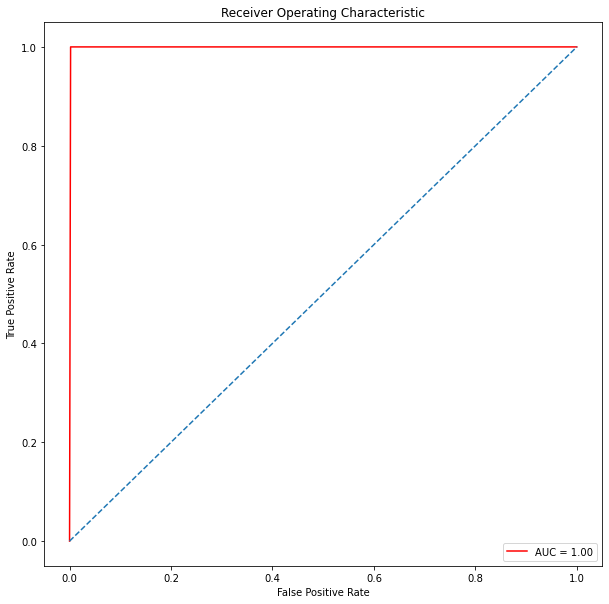

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [27]:
#Tuned model
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
                    'penalty':['l1','l2']
                   }

from sklearn.model_selection import GridSearchCV
LR= GridSearchCV(LR_model, tuned_parameters,cv=10)

LR.fit(X_train,y_train)

print(LR.best_params_)

y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_test)      #LR.score(X_test, y_pred)?

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

{'C': 100, 'penalty': 'l2'}


1.0

array([[ 984,    0],
       [   0, 1047]])

In [28]:
LR_model= LogisticRegression(C=100)

clf2 = LR_model.fit(X_train,y_train)

print("Accuracy is: "+ str(clf2.score(X_test,y_test)))

Accuracy is: 1.0


In [29]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9989837398373983

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(-0.05, 1.05, -0.05, 1.05)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

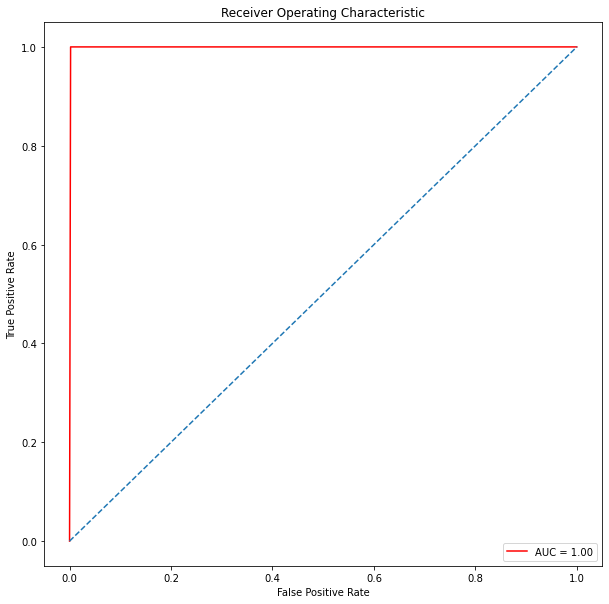

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

<AxesSubplot:ylabel='name'>

Text(0, 0.5, 'variable name')

Text(0.5, 1.0, 'Classification - TOP20 features (importance)')

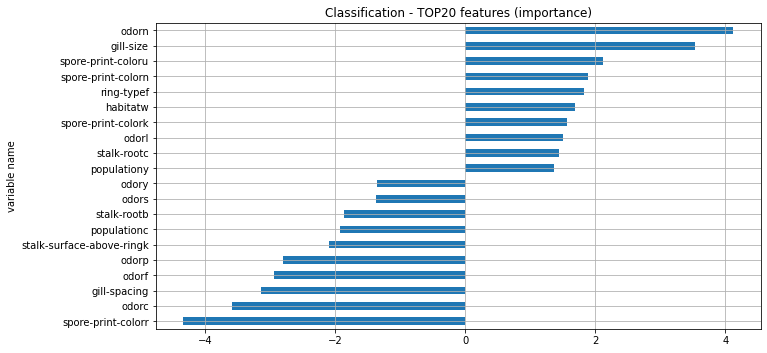

In [31]:
values = clf.coef_[0]
names = X_train.columns

importance = pd.DataFrame({"value": values, "name": names}).sort_values("value")
importance = importance.set_index("name")

# TOP20 FACTORS
top20 = pd.concat([importance["value"].head(10),importance["value"].tail(10)])

fig, ax = plt.subplots(figsize=(12,5), gridspec_kw={"top": 0.90, "bottom":0.05, "left":0.2})

top20.plot.barh(ax=ax)

plt.rcParams['axes.axisbelow'] = True
plt.ylabel("variable name")
plt.grid(True)
plt.title("Classification - TOP20 features (importance)")

In [32]:
Importance_Ranking = pd.concat([importance["value"].head(40),importance["value"].tail(40)]).sort_values(ascending=False)
Importance_Ranking

name
odorn                        4.12
gill-size                    3.54
spore-print-coloru           2.11
spore-print-colorn           1.89
ring-typef                   1.82
habitatw                     1.69
spore-print-colork           1.57
odorl                        1.50
stalk-rootc                  1.45
populationy                  1.36
cap-colorc                   1.27
populationn                  1.07
stalk-surface-above-rings    0.86
stalk-shape                  0.84
stalk-rootr                  0.83
gill-colore                  0.76
gill-colorn                  0.75
stalk-color-above-ringo      0.67
stalk-color-above-ringe      0.66
cap-shapes                   0.63
gill-colorp                  0.61
gill-colork                  0.59
gill-colorw                  0.58
cap-coloru                   0.54
cap-colorn                   0.53
cap-colorr                   0.50
bruises                      0.43
gill-coloru                  0.36
stalk-color-above-ringg      0.34
stalk-col

### Naive Bayes Model

In [33]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB()

In [34]:
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_test)


0.9901526341703595

In [35]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[ 984,    0],
       [  20, 1027]])

In [36]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9904489016236867

### Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [38]:
rf.fit(X_train , y_train)
rf.score(X_train , y_train)

RandomForestClassifier(max_depth=5)

0.9926144756277696

In [39]:
predictions = rf.predict(X_test)
rf.score(X_test , y_test)

0.9881831610044313

In [40]:
accuracy_score(y_test , predictions)  #The same as above

0.9881831610044313

### Decision Tree

In [41]:
X = df.drop(['class'], axis=1) #切换dataset to df
y = df['class']

X.head()
y.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape

(6499, 22)

In [43]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
score

1.0

In [44]:
clf.feature_importances_  

array([0.        , 0.        , 0.        , 0.02716279, 0.02397249,
       0.        , 0.        , 0.14621746, 0.26817376, 0.        ,
       0.09930023, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.38651374,
       0.02185554, 0.026804  ])

In [45]:
feature_name=['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape'
              ,'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type'
              ,'veil-color','ring-number','ring-type','spore-print-color','population','habitat']
print(len(feature_name))

22


In [46]:
[*zip(feature_name,clf.feature_importances_)]

[('cap-shape', 0.0),
 ('cap-surface', 0.0),
 ('cap-color', 0.0),
 ('bruises', 0.027162786951459204),
 ('odor', 0.023972489775133166),
 ('gill-attachment', 0.0),
 ('gill-spacing', 0.0),
 ('gill-size', 0.14621745754606932),
 ('gill-color', 0.2681737587145311),
 ('stalk-shape', 0.0),
 ('stalk-root', 0.09930023122224009),
 ('stalk-surface-above-ring', 0.0),
 ('stalk-surface-below-ring', 0.0),
 ('stalk-color-above-ring', 0.0),
 ('stalk-color-below-ring', 0.0),
 ('veil-type', 0.0),
 ('veil-color', 0.0),
 ('ring-number', 0.0),
 ('ring-type', 0.0),
 ('spore-print-color', 0.3865137366924967),
 ('population', 0.02185554229856966),
 ('habitat', 0.026803996799500723)]

In [47]:
clf=tree.DecisionTreeClassifier(criterion='entropy'      
                                ,random_state=30
                                ,splitter='random')
clf=clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
score

1.0

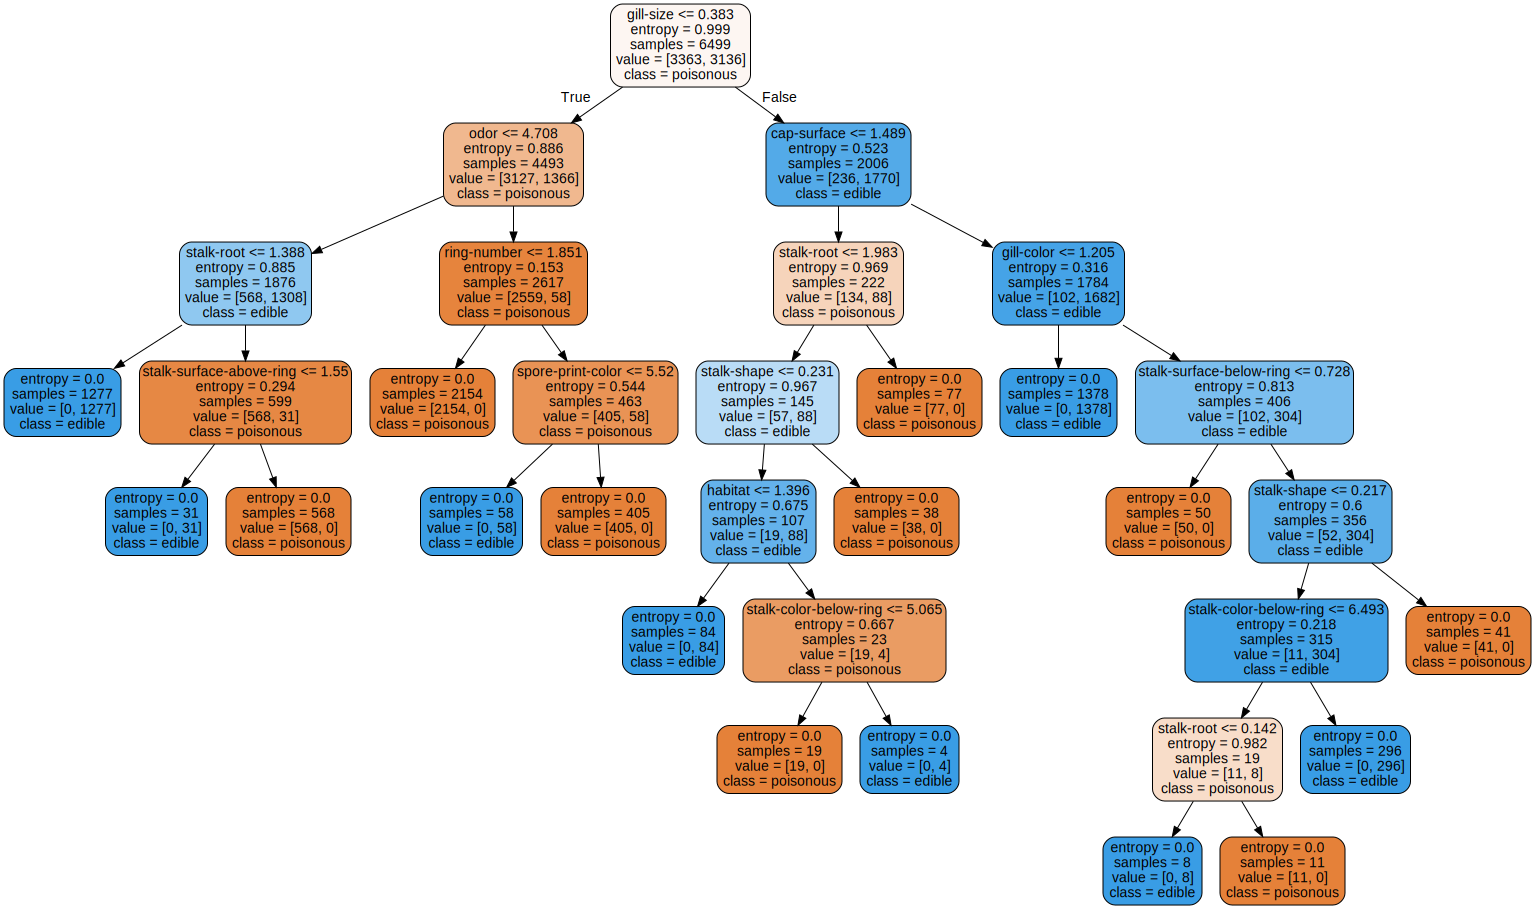

In [48]:
import graphviz
dot_data=tree.export_graphviz(clf
                             ,feature_names=feature_name
                             ,class_names=['poisonous','edible']
                             ,filled=True
                             ,rounded=True)
graph=graphviz.Source(dot_data)
graph

Text(0.5, 1.0, 'Normalized Confusion Matrix of Mushroom Dataset')

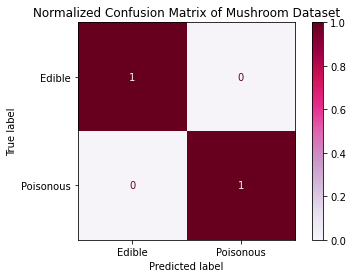

In [49]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

### Kernel SVM Model

In [50]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [51]:
pca = PCA(n_components=10, whiten=True, random_state=42)     #提取的特征维度为10维
svc = SVC(kernel='linear',class_weight='balanced')           #使用线性分类器的SVM
model = make_pipeline(pca, svc) 

In [52]:
X = data.drop(['class'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41)

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[0.01, 0.1, 1, 10, 100, 1000]} 
grid = GridSearchCV(model,param_grid)
%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 1min 3s, sys: 239 ms, total: 1min 3s
Wall time: 49.3 s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=10, random_state=42,
                                            whiten=True)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            kernel='linear'))]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100, 1000]})

{'svc__C': 10}


In [54]:
model=grid.best_estimator_

In [55]:
y_pred=model.predict(X_test)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       984
           1       0.95      0.95      0.95      1047

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



### Neural Networks

In [57]:
data = data.sample(frac=1)  #shuffle encoded data
# partition into training (60%), validation (20%), and test set (20%)
samples = data.shape[0]
train_count = round(samples * 0.6)
val_count = round(samples * 0.2)
test_count = samples - train_count - val_count

train_df = data.iloc[:train_count]
validation_df = data.iloc[train_count:train_count + val_count]
test_df = data.iloc[-test_count:]

X_train = train_df.drop(['class'], axis=1)
X_validation = validation_df.drop(['class'], axis=1)
X_test = test_df.drop(['class'], axis=1)

y_train = train_df['class']
y_validation = validation_df['class']
y_test = test_df['class']

In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
import mglearn
from sklearn.neural_network import MLPRegressor


In [59]:
# Basic Neural Networks model
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train)*100)
print(mlp.score(X_validation, y_validation)*100)
print(mlp.score(X_test, y_test)*100)

100.0
100.0
100.0


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# hyperparameter tuning: alpha

pipe = make_pipeline(MLPClassifier(solver="lbfgs", max_iter = 5000, random_state=0))
param_grid = {'mlpclassifier__alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(pipe, param_grid, return_train_score=True)

In [61]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('mlpclassifier',
                                        MLPClassifier(max_iter=5000,
                                                      random_state=0,
                                                      solver='lbfgs'))]),
             param_grid={'mlpclassifier__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True)

In [62]:
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__alpha",
                          values=["mean_test_score", "mean_train_score"])

In [63]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlpclassifier__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.14,0.04,0.00,0.00,0.00,{'mlpclassifier__alpha': 0.001},1.00,1.00,1.00,1.00,1.00,1.00,0.00,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00
1,0.12,0.01,0.00,0.00,0.01,{'mlpclassifier__alpha': 0.01},1.00,1.00,1.00,1.00,1.00,1.00,0.00,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00
2,0.12,0.01,0.00,0.00,0.10,{'mlpclassifier__alpha': 0.1},1.00,1.00,1.00,1.00,1.00,1.00,0.00,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00
3,0.23,0.02,0.00,0.00,1.00,{'mlpclassifier__alpha': 1.0},1.00,1.00,1.00,1.00,1.00,1.00,0.00,4,1.00,1.00,1.00,1.00,1.00,1.00,0.00
4,0.37,0.01,0.00,0.00,10.00,{'mlpclassifier__alpha': 10.0},1.00,1.00,1.00,1.00,1.00,1.00,0.00,5,1.00,1.00,1.00,1.00,1.00,1.00,0.00
5,0.24,0.01,0.00,0.00,100.00,{'mlpclassifier__alpha': 100.0},0.99,0.99,0.99,0.99,0.99,0.99,0.00,6,0.99,0.99,0.99,0.99,0.99,0.99,0.00
6,0.21,0.03,0.00,0.00,1000.00,{'mlpclassifier__alpha': 1000.0},0.92,0.92,0.91,0.92,0.93,0.92,0.01,7,0.92,0.92,0.92,0.92,0.92,0.92,0.00


In [64]:
res

,mean_test_score,mean_train_score
param_mlpclassifier__alpha,,
0.00,1.00,1.00
0.01,1.00,1.00
0.10,1.00,1.00
1.00,1.00,1.00
10.00,1.00,1.00
100.00,0.99,0.99
1000.00,0.92,0.92


<AxesSubplot:xlabel='param_mlpclassifier__alpha'>

(0.95, 1.01)

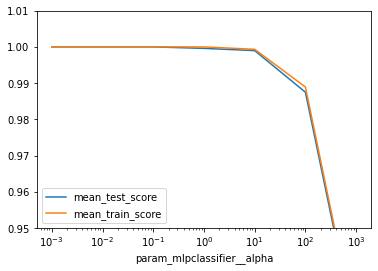

In [65]:
res.plot()
plt.xscale("log")
plt.ylim(0.95, 1.01)

In [66]:
# hyperparameter tuning: hidden_layer_sizes

pipe = make_pipeline( MLPClassifier(solver="lbfgs", random_state=0))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (50,), (100,), (500,), (10, 10), (50, 50), (100, 100), (500, 500)]
             }
grid = GridSearchCV(pipe, param_grid,return_train_score=True)

In [67]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('mlpclassifier',
                                        MLPClassifier(random_state=0,
                                                      solver='lbfgs'))]),
             param_grid={'mlpclassifier__hidden_layer_sizes': [(10,), (50,),
                                                               (100,), (500,),
                                                               (10, 10),
                                                               (50, 50),
                                                               (100, 100),
                                                               (500, 500)]},
             return_train_score=True)

In [68]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlpclassifier__hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.03,0.01,0.00,0.00,"(10,)","{'mlpclassifier__hidden_layer_sizes': (10,)}",1.00,1.00,1.00,1.00,1.00,1.00,0.00,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00
1,0.06,0.00,0.00,0.00,"(50,)","{'mlpclassifier__hidden_layer_sizes': (50,)}",1.00,1.00,1.00,1.00,1.00,1.00,0.00,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00
2,0.12,0.01,0.00,0.00,"(100,)","{'mlpclassifier__hidden_layer_sizes': (100,)}",1.00,1.00,1.00,1.00,1.00,1.00,0.00,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00
3,0.54,0.06,0.01,0.00,"(500,)","{'mlpclassifier__hidden_layer_sizes': (500,)}",1.00,1.00,1.00,1.00,1.00,1.00,0.00,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00
4,0.05,0.00,0.00,0.00,"(10, 10)","{'mlpclassifier__hidden_layer_sizes': (10, 10)}",1.00,1.00,1.00,1.00,1.00,1.00,0.00,5,1.00,1.00,1.00,1.00,1.00,1.00,0.00
5,0.15,0.03,0.00,0.00,"(50, 50)","{'mlpclassifier__hidden_layer_sizes': (50, 50)}",1.00,1.00,1.00,1.00,1.00,1.00,0.00,5,1.00,1.00,1.00,1.00,1.00,1.00,0.00
6,0.25,0.02,0.00,0.00,"(100, 100)","{'mlpclassifier__hidden_layer_sizes': (100, 100)}",1.00,1.00,1.00,1.00,1.00,1.00,0.00,5,1.00,1.00,1.00,1.00,1.00,1.00,0.00
7,2.32,0.07,0.01,0.00,"(500, 500)","{'mlpclassifier__hidden_layer_sizes': (500, 500)}",1.00,1.00,1.00,1.00,1.00,1.00,0.00,5,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [69]:
res = results.pivot_table(index="param_mlpclassifier__hidden_layer_sizes", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

In [70]:
res

,mean_test_score,mean_train_score,std_test_score,std_train_score
param_mlpclassifier__hidden_layer_sizes,,,,
"(10,)",1.00,1.00,0.00,0.00
"(10, 10)",1.00,1.00,0.00,0.00
"(50,)",1.00,1.00,0.00,0.00
"(50, 50)",1.00,1.00,0.00,0.00
"(100,)",1.00,1.00,0.00,0.00
"(100, 100)",1.00,1.00,0.00,0.00
"(500,)",1.00,1.00,0.00,0.00
"(500, 500)",1.00,1.00,0.00,0.00


### DNN (Deep Neural Networks)

In [71]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import binary_crossentropy
from keras.layers import Dense, Activation

In [72]:
num_features = data.shape[1] - 1
num_features

80

In [73]:
### Build neural network architecture ###
num_features = data.shape[1] - 1

model = Sequential([
    Dense(16, input_shape=(num_features,)),
    Activation('relu'),
    Dense(12),
    Activation('relu'),
    Dense(8),
    Activation('relu'),
    Dense(4),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid')
])


In [74]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['binary_accuracy'])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1296      
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
activation_1 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 3

In [76]:
my_epochs =10
history = model.fit(X_train, y_train, epochs=my_epochs, batch_size=20,
                    validation_data=(X_test, y_test))

Epoch 1/10
244/244 [==============================] - 1s 3ms/step - loss: 0.4712 - binary_accuracy: 0.7926 - val_loss: 0.0271 - val_binary_accuracy: 0.9920
Epoch 2/10
244/244 [==============================] - 0s 818us/step - loss: 0.0180 - binary_accuracy: 0.9961 - val_loss: 0.0085 - val_binary_accuracy: 0.9988
Epoch 3/10
244/244 [==============================] - 0s 805us/step - loss: 0.0071 - binary_accuracy: 0.9983 - val_loss: 0.0040 - val_binary_accuracy: 0.9988
Epoch 4/10
244/244 [==============================] - 0s 792us/step - loss: 0.0024 - binary_accuracy: 1.0000 - val_loss: 0.0014 - val_binary_accuracy: 1.0000
Epoch 5/10
244/244 [==============================] - 0s 795us/step - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 8.5229e-04 - val_binary_accuracy: 1.0000
Epoch 6/10
244/244 [==============================] - 0s 793us/step - loss: 5.0879e-04 - binary_accuracy: 1.0000 - val_loss: 7.7484e-04 - val_binary_accuracy: 1.0000
Epoch 7/10
244/244 [======================

In [77]:
pd.DataFrame(history.history)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.26,0.91,0.03,0.99
1,0.01,1.00,0.01,1.00
2,0.00,1.00,0.00,1.00
3,0.00,1.00,0.00,1.00
4,0.00,1.00,0.00,1.00
5,0.00,1.00,0.00,1.00
6,0.00,1.00,0.00,1.00
7,0.00,1.00,0.00,1.00
8,0.00,1.00,0.00,1.00
9,0.00,1.00,0.00,1.00


<AxesSubplot:>

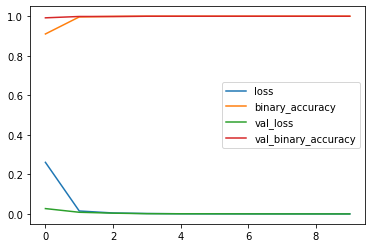

In [78]:
pd.DataFrame(history.history).plot()

In [79]:
score = model.evaluate(X_validation, y_validation, verbose=0)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)


print("Validation Accuracy: {:.2f}".format(score[1]*100))
print('Test Accuracy: %.2f' % (accuracy*100))

Validation Accuracy: 100.00
Test Accuracy: 100.00


## Bundled Together

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X = data.drop(['class'], axis=1)
y = data['class']
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((6499, 80), (6499,))

((1625, 80), (1625,))

In [81]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [82]:
names = ["Logistic_Regression", "Logistic_Regression_Tuned", "Nearest_Neighbors", "Linear_SVM", 
         "Polynomial_SVM", "Gradient_Boosting", 
         "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    LogisticRegression(solver="lbfgs"),
    LogisticRegression(solver="lbfgs", C=100),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=10),
    SVC(kernel="poly", degree=3, C=10),
#     SVC(kernel="rbf", C=1, gamma=2),  #, "RBF_SVM"
#     GaussianProcessClassifier(1.0 * RBF(1.0)),  #"Gaussian_Process",
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha = 1, hidden_layer_sizes=50, max_iter=1000, random_state=0),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [83]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

LogisticRegression()

LogisticRegression(C=100)

KNeighborsClassifier(n_neighbors=3)

SVC(C=10, kernel='linear')

SVC(C=10, kernel='poly')

GradientBoostingClassifier(learning_rate=1.0)

DecisionTreeClassifier(max_depth=5)

ExtraTreesClassifier(n_estimators=10)

RandomForestClassifier(max_depth=5)

MLPClassifier(alpha=1, hidden_layer_sizes=50, max_iter=1000, random_state=0)

AdaBoostClassifier(n_estimators=100)

GaussianNB()

QuadraticDiscriminantAnalysis()

SGDClassifier()

In [84]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by="score", ascending=False)

,name,score
0,Logistic_Regression,1.00
1,Logistic_Regression_Tuned,1.00
2,Nearest_Neighbors,1.00
3,Linear_SVM,1.00
4,Polynomial_SVM,1.00
5,Gradient_Boosting,1.00
7,Extra_Trees,1.00
10,AdaBoost,1.00
12,QDA,1.00
13,SGD,1.00


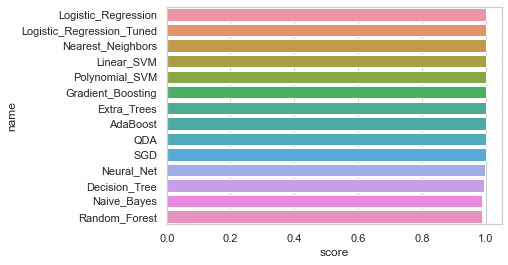

In [85]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df.sort_values(by="score", ascending=False))

## Discussion
### Results

The training, validation, and test sets all achieve ~100% accuracy. 

#### Question: Is there any overfitting problem?
Solutions:
* Check for X_test, y_test in accuracy score
* Use “stratify=y” in train_test_split
* Use cross-validation
* ANN: early stopping/dropout 
* SVM: simple Kernel
* Use 6 strong features to test models --- refer to file "Mushroom Classification_Obvious Features.ipynb"
* Dataset (mushroom) special characteristic
* Use 6 weak features  to compare the classification model accuracy --- refer to file "Mushroom Classification_6 Ambiguous Features.ipynb"


### Summary

#### 1. Classifier Selection
* Dataset characteristic
* Parameters-tuning
* Accuracy comparison

#### 2. Mushroom Edibility Indicator
* Odor
* Gill-color
* Gill-size
* Spore-print-color
* Ring-type
* Population
* Stalk-color-above/below-ring
